In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import numpy as np
import crocoddyl
import torch
from tqdm import tqdm
from utils import Solver
from utils import Datagen
from utils import TerminalModelUnicycle
from network import ValueNet
import time
torch.set_default_dtype(torch.double)

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

net0 = torch.load('./networks/net0.pth')
net10 = torch.load('./networks/net10.pth')
net20 = torch.load('./networks/net20.pth')

net42 = torch.load('./networks/net43.pth')
net43 = torch.load('./networks/net43.pth')
net44 = torch.load('./networks/net44.pth')
net45 = torch.load('./networks/net45.pth')


In [50]:
x1 = np.random.uniform(-1.5, 1.5)
x2 = np.random.uniform(-1.5, 1.5)
x3 = np.random.uniform(-.75, .75)
x0 = np.array([x1, x2, x3])
x0 = np.array([-1.14, -1.75, -.3546])
terminal_ = TerminalModelUnicycle(neural_net=net45)
ddp, log, = Solver()._solveProblem(initial_config=x0,logger=True)
ddp2, log2 = Solver(terminal_model=terminal_)._solveProblem(initial_config=x0, logger=True)
log = log.stops[1:]
log2 = log2.stops[1:]
print("\n Stopping Criteria")
print(f"\n   Crocoddyl = {log[:5]}")
print(f"\n   Terminal Croc = {log2[:5]}")

ddp.cost

ddp2.cost

net10(torch.Tensor(x0))


 Stopping Criteria

   Crocoddyl = [82.08479336475138, 59.77091206593007, 51.63161957892736, 12.103021528381927, 8.223841519943262]

   Terminal Croc = [79.01141354075325, 57.69089516840048, 48.763299681525474, 11.546724157440694, 7.827526267220767]


tensor([47.2875], grad_fn=<AddBackward0>)

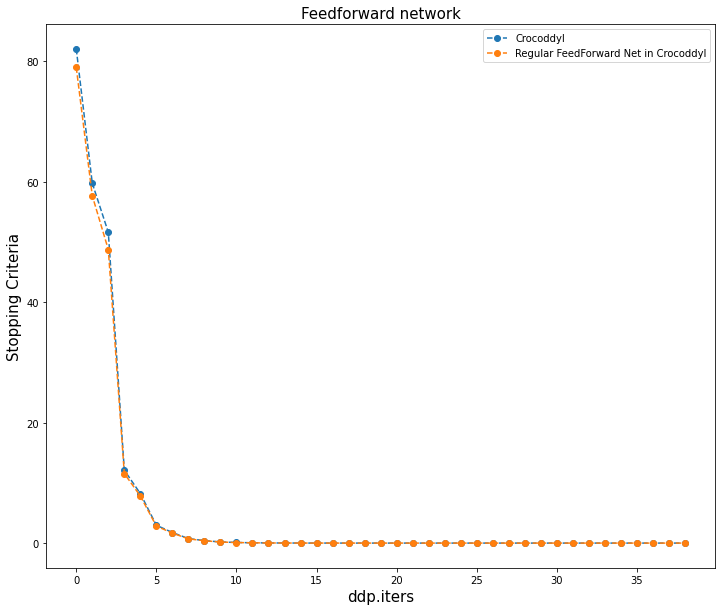

In [54]:
plt.figure(figsize=(12, 10))
plt.plot(log,'--o', label ='Crocoddyl')
plt.plot(log2, "--o", label = "Regular FeedForward Net in Crocoddyl")
plt.legend()
plt.title("Feedforward network", fontsize =15)
plt.ylabel("Stopping Criteria", fontsize =15)
plt.xlabel("ddp.iters", fontsize =15)
plt.savefig("fnet.png")